acquire images


In [ ]:
from bing_image_downloader import downloader

In [ ]:
downloader.download("dwayne johnson",limit = 100, output_dir = "/content/donnie", adult_filter_off=True, filter = "photo")

In [ ]:
downloader.download("ariana grande face",limit = 100, output_dir = "/content/ariana", adult_filter_off=True, filter = "photo")

In [ ]:
downloader.download("cristiano ronaldo face",limit = 100, output_dir = "/content/ronaldo", adult_filter_off=True, filter = "photo")

import libraries

In [8]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

store the names of images in a list

In [9]:
donnie = os.listdir("/content/rock")

In [10]:
ariana = os.listdir("/content/ariana")

In [11]:
ronaldo = os.listdir("/content/ronaldo")

Read images

In [12]:
limit = len(ronaldo)
ronaldo_images = [None] * limit
j = 0
for i in ronaldo:
    if (j<limit):
        ronaldo_images[j] = imread("/content/ronaldo/"+i)
        j+=1
    else:
        break

In [ ]:
limit = len(ariana)
ariana_images = [None] * limit
j = 0
for i in ariana:
    if (j<limit):
        ariana_images[j] = imread("/content/ariana/"+i)
        j+=1
    else:
        break

In [14]:
limit = len(donnie)
donnie_images = [None] * limit
j = 0
for i in donnie:
    if (j<limit):
        donnie_images[j] = imread("/content/rock/"+i)
        j+=1
    else:
        break

In [ ]:
imshow(ronaldo_images[44])

Convert to grayscale

In [15]:
limit_d = len(donnie)
donnie_gray = [None] * limit_d
j = 0
for i in donnie:
    if (j<limit_d):
        donnie_gray[j] = rgb2gray(donnie_images[j])
        j+=1
    else:
        break

In [16]:
limit_r = len(ronaldo)
ronaldo_gray = [None] * limit_r
j = 0
for i in ronaldo:
    if (j<limit_r):
        ronaldo_gray[j] = rgb2gray(ronaldo_images[j])
        j+=1
    else:
        break

In [ ]:
limit_a = len(ariana)
ariana_gray = [None] * limit_a
j = 0
for i in ariana:
    if (j<limit_a):
        ariana_gray[j] = rgb2gray(ariana_images[j])
        j+=1
    else:
        break

In [ ]:
imshow(donnie_gray[1])

resize all images to fixed size

In [17]:
    donnie =  donnie_gray[j]
    donnie_gray[j]=resize(donnie, (512,512))

In [18]:
for j in range(limit_r):
    ronaldo =  ronaldo_gray[j]
    ronaldo_gray[j]=resize(ronaldo, (512,512))

In [ ]:
for j in range(limit_a):
    ariana =  ariana_gray[j]
    ariana_gray[j]=resize(ariana, (512,512))

In [19]:
img_length_r = len(ronaldo_gray)
img_length_r

80

In [ ]:
img_length_a = len(ariana_gray)
img_length_a

In [21]:

img_length_d = len(donnie_gray)
img_length_d

79

In [22]:
img_size = ronaldo_gray[5].shape
img_size

(512, 512)

flatten image

In [23]:
flatten_size = img_size[0] * img_size[1]
flatten_size

262144

In [24]:
for i in range(img_length_d):
  donnie_gray[i] = np.ndarray.flatten(donnie_gray[i]).reshape(flatten_size,1)

In [ ]:
for i in range(img_length_a):
  ariana_gray[i] = np.ndarray.flatten(ariana_gray[i]).reshape(flatten_size,1)

In [25]:
for i in range(img_length_r):
  ronaldo_gray[i] = np.ndarray.flatten(ronaldo_gray[i]).reshape(flatten_size,1)

stack individual values

In [26]:
donnie_gray = np.dstack(donnie_gray)

In [ ]:
ariana_gray = np.dstack(ariana_gray)

In [27]:
ronaldo_gray = np.dstack(ronaldo_gray)

In [ ]:
donnie_gray.shape

rollaxis on the dimensions of images

In [28]:
donnie_gray = np.rollaxis(donnie_gray, axis = 2,start = 0)

In [ ]:
ariana_gray = np.rollaxis(ariana_gray, axis = 2,start = 0)

In [29]:
ronaldo_gray = np.rollaxis(ronaldo_gray, axis = 2,start = 0)

In [ ]:
donnie_gray.shape

reshape

In [30]:
donnie_gray = donnie_gray.reshape(img_length_d, flatten_size)
donnie_gray.shape

(79, 262144)

In [ ]:
ariana_gray = ariana_gray.reshape(img_length_a, flatten_size)
ariana_gray.shape

In [31]:
ronaldo_gray = ronaldo_gray.reshape(img_length_r, flatten_size)
ronaldo_gray.shape

(80, 262144)

convert to dataframe

In [32]:
donnie_df = pd.DataFrame(donnie_gray)
donnie_df.head()

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.783298,0.795809,0.839307,0.874686,0.900658,0.895228,0.884053,0.867286,0.859815,0.854400,...,0.694248,0.694092,0.694005,0.693182,0.691263,0.688217,0.687464,0.687354,0.687243,0.687211
1,0.569454,0.569454,0.569454,0.569454,0.570982,0.572629,0.574275,0.575922,0.577569,0.579216,...,0.312754,0.301226,0.295397,0.290694,0.290321,0.295166,0.300356,0.309982,0.319607,0.315936
2,0.867431,0.867331,0.867487,0.867643,0.867972,0.868448,0.868923,0.868970,0.868970,0.868773,...,0.860484,0.860144,0.861554,0.863700,0.872627,0.881554,0.886385,0.886385,0.886385,0.886385
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.084244,0.078974,0.060653,0.044749,0.031626,0.027779,0.025492,0.024723,0.024293,0.023602,...,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059


In [ ]:
ariana_df = pd.DataFrame(ariana_gray)
ariana_df.head()

In [33]:
ronaldo_df = pd.DataFrame(ronaldo_gray)
ronaldo_df["label"] = "Cristiano Ronaldo"
ronaldo_df.head()

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.556718,0.556718,0.556718,0.556718,0.556718,0.556718,0.556718,0.556718,0.556718,0.556718,...,0.643207,0.643207,0.644816,0.648655,0.650798,0.650798,0.650798,0.650798,0.650798,Cristiano Ronaldo
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cristiano Ronaldo
2,0.336791,0.337017,0.337789,0.337835,0.338191,0.339717,0.340759,0.341365,0.342725,0.344141,...,0.420188,0.416879,0.398497,0.385553,0.378659,0.370596,0.362222,0.354557,0.352308,Cristiano Ronaldo
3,0.845652,0.845652,0.845652,0.845652,0.845652,0.845652,0.845652,0.845652,0.845652,0.845652,...,0.857417,0.857003,0.854705,0.853495,0.853495,0.853495,0.853495,0.853495,0.853495,Cristiano Ronaldo
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.841052,0.813634,0.774784,0.690654,0.606524,0.544412,0.502547,0.460682,0.489177,Cristiano Ronaldo


In [34]:
donnie_df["label"] = "Dwayne Johnson"
#ariana_df["label"] = "Ariana Grande"

In [35]:
#df_1 = pd.concat([donnie_df, ariana_df])
df = pd.concat([
    donnie_df, ronaldo_df])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.783298,0.795809,0.839307,0.874686,0.900658,0.895228,0.884053,0.867286,0.859815,0.854400,...,0.694092,0.694005,0.693182,0.691263,0.688217,0.687464,0.687354,0.687243,0.687211,Dwayne Johnson
1,0.569454,0.569454,0.569454,0.569454,0.570982,0.572629,0.574275,0.575922,0.577569,0.579216,...,0.301226,0.295397,0.290694,0.290321,0.295166,0.300356,0.309982,0.319607,0.315936,Dwayne Johnson
2,0.867431,0.867331,0.867487,0.867643,0.867972,0.868448,0.868923,0.868970,0.868970,0.868773,...,0.860144,0.861554,0.863700,0.872627,0.881554,0.886385,0.886385,0.886385,0.886385,Dwayne Johnson
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Dwayne Johnson
4,0.084244,0.078974,0.060653,0.044749,0.031626,0.027779,0.025492,0.024723,0.024293,0.023602,...,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,0.026059,Dwayne Johnson


In [36]:
from sklearn.utils import shuffle

In [37]:
df_index = shuffle(df).reset_index()

In [38]:
df_index.head()

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,18,0.216529,0.217080,0.219317,0.221553,0.223964,0.227697,0.231155,0.234132,0.237569,...,0.231640,0.229834,0.225209,0.220680,0.216207,0.209758,0.202757,0.193811,0.191605,Cristiano Ronaldo
1,0,0.783298,0.795809,0.839307,0.874686,0.900658,0.895228,0.884053,0.867286,0.859815,...,0.694092,0.694005,0.693182,0.691263,0.688217,0.687464,0.687354,0.687243,0.687211,Dwayne Johnson
2,5,0.195254,0.195254,0.195254,0.195254,0.195254,0.195254,0.195254,0.195254,0.195254,...,0.792425,0.792425,0.792958,0.794988,0.796347,0.796347,0.792307,0.782158,0.781469,Cristiano Ronaldo
3,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Dwayne Johnson
4,42,0.492869,0.492869,0.492869,0.492869,0.492869,0.492869,0.492869,0.492869,0.492869,...,0.502684,0.503098,0.505395,0.506605,0.506605,0.506605,0.506605,0.506605,0.506605,Dwayne Johnson


In [39]:
df_index.drop(columns = ["index"],axis = 1,inplace=True)

In [40]:
x = df_index.values[:,:-1]

In [41]:
y = df_index.values[:,-1]

train test split of dataset

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [43]:
from sklearn import svm

In [44]:
model = svm.SVC()

build svm model using training dataset

In [45]:
model.fit(x_train, y_train)

SVC()

prediction

In [46]:
y_pred = model.predict(x_test)

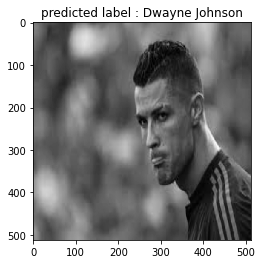

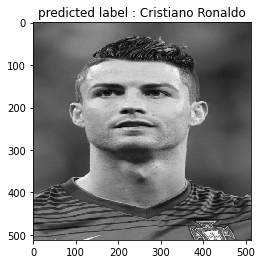

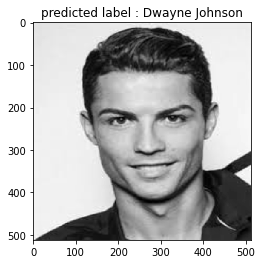

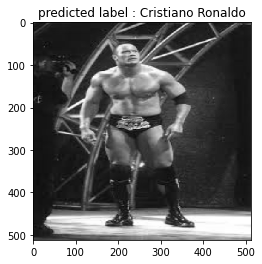

In [49]:
for i in (np.random.randint(0,6,4)):
  predicted_images = (np.reshape(x_test[i], (512,512)).astype(np.float64))
  plt.title("predicted label : {}".format(y_pred[i]))
  plt.imshow(predicted_images, interpolation="nearest", cmap = "gray")
  plt.show()

evaluation metrics i) accuracy

In [47]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.75

evaluation metrics ii) Confusion matrix

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15,  5],
       [ 3,  9]])